## Graduate Rotational Internship Program : The Sparks Foundation
## Data Science & Business Analytics Intern
### Author : Aishwarya Mandhare

### Task 2 : Prediction using Unsupervised ML
#### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Import libraries¶

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Import the dataset from csv file (for this we use pandas library)

In [2]:
df=pd.read_csv(r"C:\Users\ISHWARIYA\Downloads\Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Information 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape

(150, 6)

### Dropping unnecessary column

In [7]:
df_new=df.drop(['Id'],axis=1)

In [8]:
df_new.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


###  spliting the dataset into dependent and independent variables¶

In [9]:
x=df_new.iloc[:,[0,1,2,3]].values ##independent variable


In [10]:
y=df_new.iloc[:,4].values ##dependent variable


In [11]:
df['Species'].unique() ##unique elements in target variable

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Elbow method

1)A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered.

2)The Elbow Method is one of the most popular methods to determine this optimal value of k.

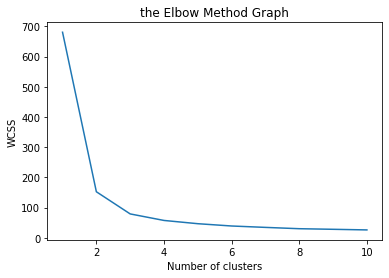

In [12]:
from sklearn.cluster import KMeans
wcss_list=[] #Initializing the list for the values of wcss
#Taking different k from 1-10
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1,11), wcss_list)
plt.title('the Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

1)The optimum clusters is where the elbow occurs. 

2)This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

3)From this we choose the number of clusters as 3.

In [13]:
kmeans=KMeans(n_clusters=3, init='k-means++', random_state=0)
y_pred=kmeans.fit_predict(x)

### Visualising the clusters

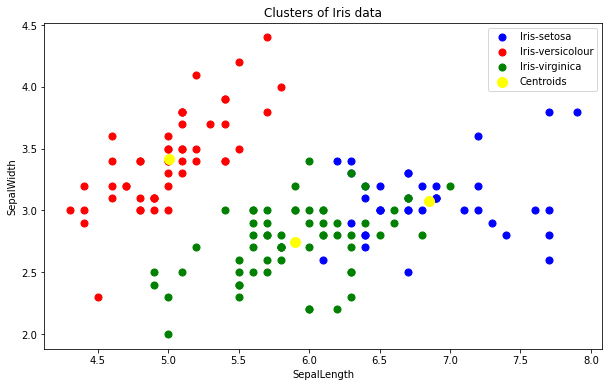

In [14]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,6))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], 
            s = 50, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], 
            s = 50, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')
plt.title("Clusters of Iris data")
plt.xlabel("SepalLength")
plt.ylabel("SepalWidth")

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()